<a href="https://colab.research.google.com/github/Bibidef/Template_DS/blob/main/Copie2_de_Projet_Meteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Global Libraries**

In [86]:
import pandas as pd
import os.path
import sys
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay


#
# Répertoire courant
#
cwd = sys.path[0]
# path = "../../../data/processed"
path = ""

## **Functions**

In [87]:
# -----------------------------------------------------------------------------
def build (size_of_test=0.2) :

    """
    Création des sets de validation et de test.
    Renvoie un tuple (Xtrain, Xtest, ytrain, ytest) normalisé
    """

    import pandas as pd
    import os.path
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn import preprocessing

    #
    # Répertoire courant
    #
    cwd = sys.path[0]

    #
    # Lecture de la base nettoyée
    #
    print("Reading database ...")
    # df = pd.read_csv(os.path.join(cwd, "../../../data/processed", "weatherAUS_clean.csv"))
    df = pd.read_csv("weatherAUS_clean.csv")

    #
    # Features et cible
    #
    print("Cleaning useless variables ...")
    target = df['RainTomorrow']
    feats  = df.drop(['RainTomorrow', 'Date', 'Unnamed: 0'], axis=1)

    #
    # Set de validation et set de test
    #
    print("Building train/test sets ...")
    Xtrain, Xtest, ytrain, ytest = train_test_split(feats, target, test_size=size_of_test, random_state=49, stratify=target)

    #
    # Normalisation
    #
    print("Scaling ...")
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(Xtrain)
    Xtrain_sc = scaler.transform(Xtrain)
    Xtest_sc  = scaler.transform(Xtest)

    return Xtrain_sc, Xtest_sc, ytrain, ytest







# -----------------------------------------------------------------------------
def undersample (Xtrain, ytrain, strategy=1) :

    """
    Création des sets de validation avec sous-échantillonage

    Renvoie un tuple (Xtrain, ytrain) sous-échantillonné qui tient compte du
    fait que l'une des 2 classes est minoritaire
    """

    from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

    #
    # Application d'une stratégie d'undersampling
    #
    if  (strategy == 1) :

        print('UnderSampling : Random ...')
        cl = RandomUnderSampler(random_state=55)
        Xtrain, ytrain = cl.fit_resample(Xtrain, ytrain)

    elif(strategy == 2) :

        print('UnderSampling : ClusterCentroids ...')
        cl = ClusterCentroids(random_state=55)
        Xtrain, ytrain = cl.fit_resample(Xtrain, ytrain)

    return Xtrain, ytrain







# -----------------------------------------------------------------------------
def oversample (Xtrain, ytrain, strategy=1) :

    """
    Création des sets de validation avec sur-échantillonage

    Renvoie un tuple (Xtrain, ytrain) sur-échantillonné qui tient compte du
    fait que l'une des 2 classes est minoritaire
    """

    from imblearn.over_sampling import RandomOverSampler, SMOTE

    #
    # Application d'une stratégie d'undersampling
    #
    if  (strategy == 1) :

        print('OverSampling : Random ...')
        cl = RandomOverSampler(random_state=55)
        Xtrain, ytrain = cl.fit_resample(Xtrain, ytrain)

    elif(strategy == 2) :

        print('OverSampling : SMOTE ...')
        cl = SMOTE(random_state=55)
        Xtrain, ytrain = cl.fit_resample(Xtrain, ytrain)

    return Xtrain, ytrain


# -----------------------------------------------------------------------------
def resultat(model, X_train, X_test, y_train, y_test):


    y_pred = model.predict(X_test)

    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    cm = confusion_matrix(y_test, y_pred)
    plt = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    plt.plot()
    print('\n')

    # Classification Report
    print('Classification Report')
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')

    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_display = RocCurveDisplay.from_estimator(estimator=model,X=X_test, y=y_test)
    print('\n')

    # Checking model score
    print('Checking model score')
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')


# **DecisionTreeClassifier**





## 1_Normal

### Train Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# import build_sets as bs
# X_train, X_test, y_train, y_test = bs.build (size_of_test=0.2)
X_train, X_test, y_train, y_test = build (size_of_test=0.2)

#
# Entraînement du modèle
#
dtc = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=49)
dtc.fit(X_train, y_train)

dump(dtc, os.path.join(cwd, 'dtc.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...


['/content/dtc.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     17131
         1.0       0.79      0.37      0.51      4952

    accuracy                           0.84     22083
   macro avg       0.82      0.67      0.71     22083
weighted avg       0.83      0.84      0.81     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8368
Test score:  0.8372




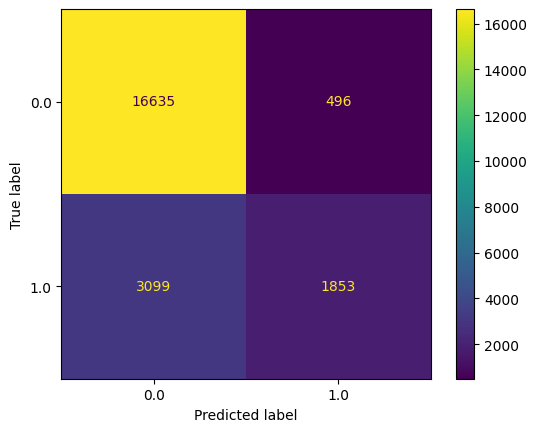

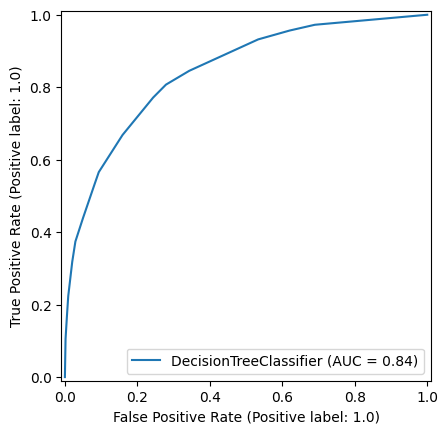

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
svm = load(os.path.join(cwd, 'dtc.joblib'))

#
# Entraînement du modèle
#
dtc = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=49)
dtc.fit(X_train, y_train)

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(dtc,X_train, X_test, y_train, y_test)


UnderSampling : Random ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81     17131
         1.0       0.45      0.81      0.58      4952

    accuracy                           0.74     22083
   macro avg       0.69      0.76      0.69     22083
weighted avg       0.82      0.74      0.76     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.7592
Test score:  0.7355




['/content/dtc_under.joblib']

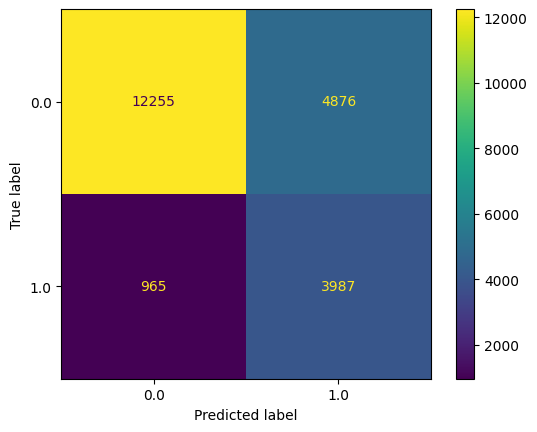

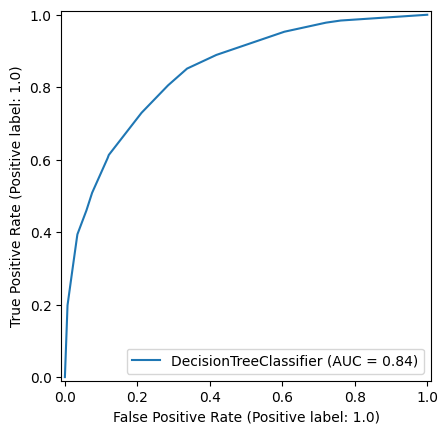

In [ ]:
#
# Undersampling
#
#X_train_under, y_train_under = bs.undersample(X_train, y_train)

X_train_under, y_train_under = undersample(X_train, y_train)

#
# Entraînement du modèle
#
dtc_under = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=49)
dtc_under.fit(X_train_under, y_train_under)

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(dtc_under,X_train_under, X_test, y_train_under, y_test)

dump(dtc_under, os.path.join(cwd, 'dtc_under.joblib'))

## 2_UnderSampling

### Train Model

In [ ]:
#
# Undersampling
#
#X_train_under, y_train_under = bs.undersample(X_train, y_train)

X_train_under, y_train_under = undersample(X_train, y_train)

#
# Entraînement du modèle
#
dtc_under = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=49)
dtc_under.fit(X_train_under, y_train_under)

dump(dtc_under, os.path.join(cwd, 'dtc_under.joblib'))

UnderSampling : Random ...


['/content/dtc_under.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81     17131
         1.0       0.45      0.81      0.58      4952

    accuracy                           0.74     22083
   macro avg       0.69      0.76      0.69     22083
weighted avg       0.82      0.74      0.76     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.7592
Test score:  0.7355




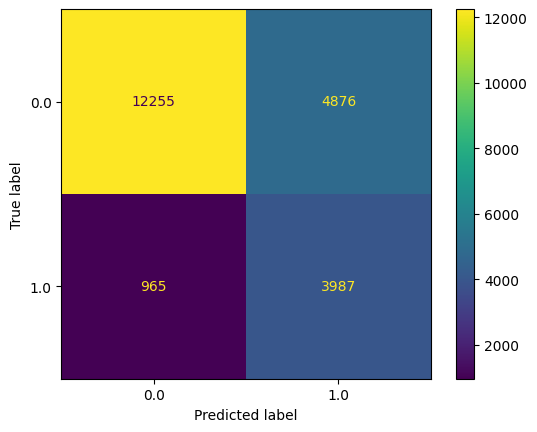

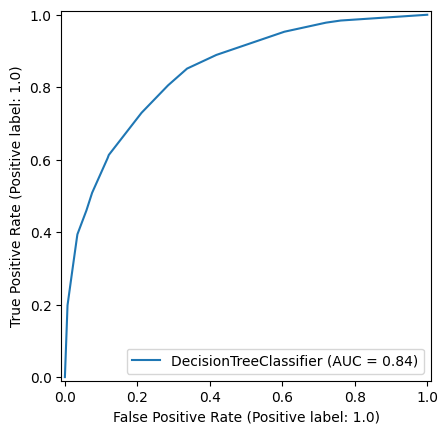

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
dtc_under = load(os.path.join(cwd, 'dtc_under.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(dtc_under,X_train_under, X_test, y_train_under, y_test)

## 3_Oversampling

### Train Model

In [ ]:
#
# Oversampling
#
#X_train_over, y_train_over = bs.oversample(X_train, y_train)

X_train_over, y_train_over = oversample(X_train, y_train)

#
# Entraînement du modèle
#
dtc_over = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=49)
dtc_over.fit(X_train_over, y_train_over)

dump(dtc_over, os.path.join(cwd, 'dtc_over.joblib'))

OverSampling : Random ...


['/content/dtc_over.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     17131
         1.0       0.45      0.81      0.58      4952

    accuracy                           0.73     22083
   macro avg       0.69      0.76      0.69     22083
weighted avg       0.82      0.73      0.75     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.7588
Test score:  0.7333




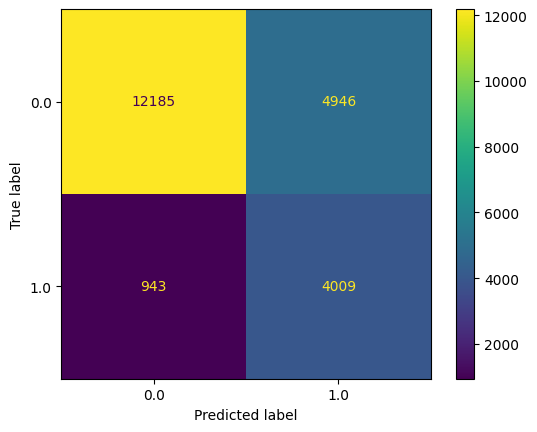

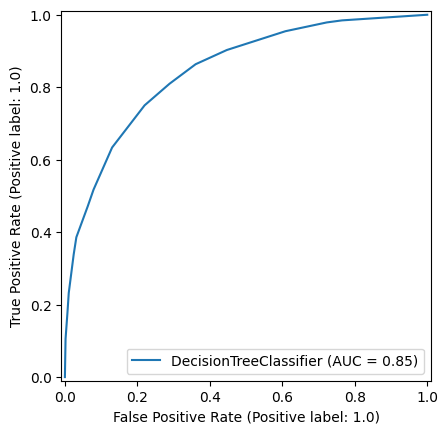

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
dtc_over = load(os.path.join(cwd, 'dtc_over.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(dtc_over,X_train_over, X_test, y_train_over, y_test)


## 4_Optim_GridSearch

### Train Model

In [ ]:
#
# Find best model with GridCV
#
print('Finding best score')
dtree_parameters = {'max_depth':range(3,20)}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtree_parameters, n_jobs=4)
#dtc_gs.fit(X_train_under, y_train_under)
dtc_gs.fit(X_train, y_train)

print("Best score/params: ", dtc_gs.best_score_, dtc_gs.best_params_)

#
# Sauvegarde du modèle
#
dump(dtc_gs, os.path.join(cwd, 'dtc_gs.joblib'))

# Application du meilleur paramètre
dtc_best = DecisionTreeClassifier(criterion ='entropy', max_depth=7, random_state=49)
dtc_best.fit(X_train, y_train)


#
# Sauvegarde best
#
dump(dtc_best, os.path.join(cwd, 'dtc_best.joblib'))

Finding best score
Best score/params:  0.8456435473476791 {'max_depth': 8}


['/content/dtc_best.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90     17131
         1.0       0.73      0.49      0.59      4952

    accuracy                           0.85     22083
   macro avg       0.80      0.72      0.75     22083
weighted avg       0.84      0.85      0.83     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8577
Test score:  0.8457




['/content/dtc_gs.joblib']

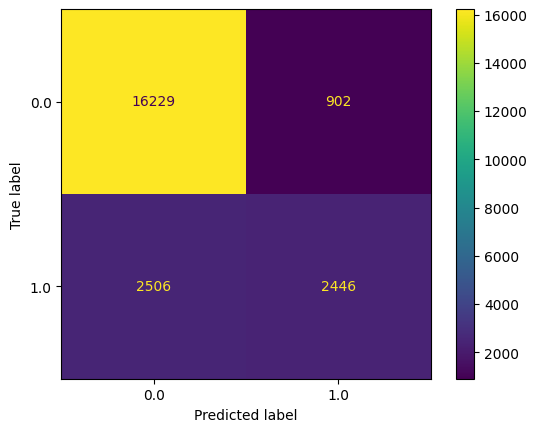

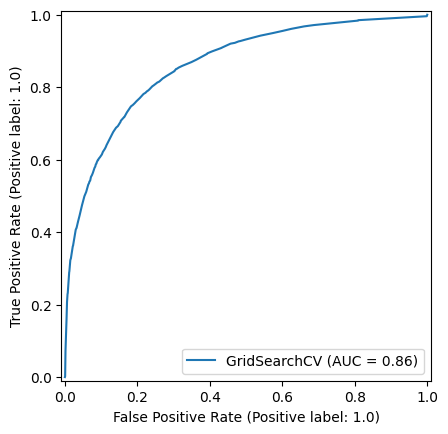

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
dtc_gs = load(os.path.join(cwd, 'dtc_gs.joblib'))


#
# Résultats Best ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(dtc_gs,X_train, X_test, y_train, y_test)

# Sauvegarde du modèle
#
dump(dtc_gs, os.path.join(cwd, 'dtc_gs.joblib'))

## 5_Interpret



---



# **Logistic Regression**

## 1_Normal

### Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = build (size_of_test=0.2)

#
# Entraînement du modèle
#
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

dump(lr, os.path.join(cwd, 'lr.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...


['/content/lr.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     17131
         1.0       0.73      0.52      0.61      4952

    accuracy                           0.85     22083
   macro avg       0.80      0.73      0.76     22083
weighted avg       0.84      0.85      0.84     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8495
Test score:  0.8481




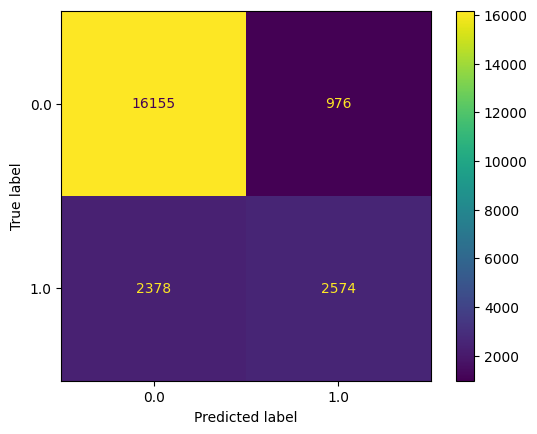

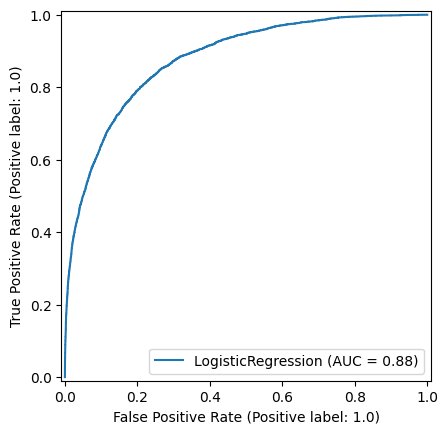

In [ ]:
# import resultat
# import build_sets as bs

# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
lr = load(os.path.join(cwd, 'lr.joblib'))


#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(lr,X_train, X_test, y_train, y_test)


## 2_UnderSampling

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Undersampling
#
X_train_under, y_train_under = undersample(X_train, y_train)

#
# Entraînement du modèle
#
lr_under = LogisticRegression(random_state=42)
lr_under.fit(X_train_under, y_train_under)

dump(lr_under, os.path.join(cwd, 'lr_under.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
UnderSampling : Random ...


['/content/lr_under.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     17131
         1.0       0.54      0.78      0.64      4952

    accuracy                           0.80     22083
   macro avg       0.73      0.79      0.75     22083
weighted avg       0.84      0.80      0.81     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.7929
Test score:  0.8




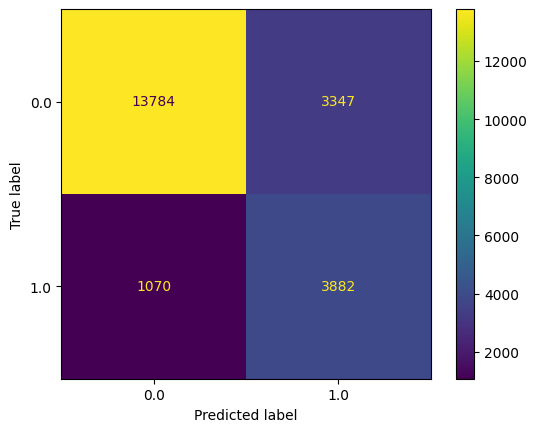

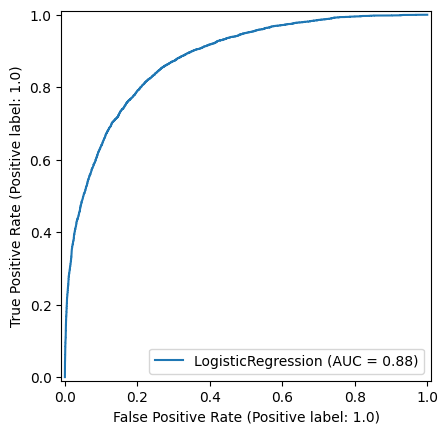

In [ ]:
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
lr_under = load(os.path.join(cwd, 'lr_under.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(lr_under,X_train_under, X_test, y_train_under, y_test)


## 3_Oversampling

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Oversampling
#
X_train_over, y_train_over = oversample(X_train, y_train, strategy=2)

#
# Entraînement du modèle
#
lr_over = LogisticRegression(random_state=42)
lr_over.fit(X_train_over, y_train_over)

# Sauvegarde du modèle
#
dump(lr_over, os.path.join(cwd, 'lr_over.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
OverSampling : SMOTE ...


['/content/lr_over.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86     17131
         1.0       0.54      0.78      0.64      4952

    accuracy                           0.80     22083
   macro avg       0.73      0.79      0.75     22083
weighted avg       0.84      0.80      0.81     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.795
Test score:  0.8025




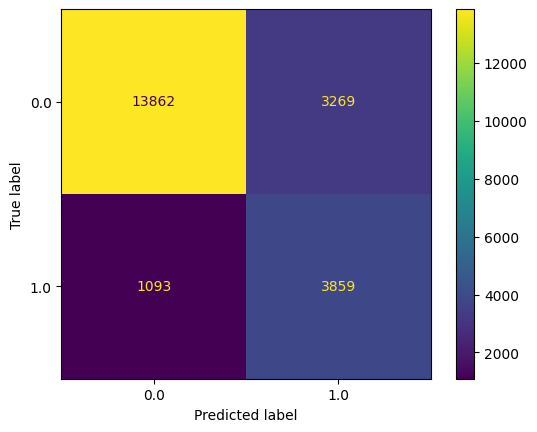

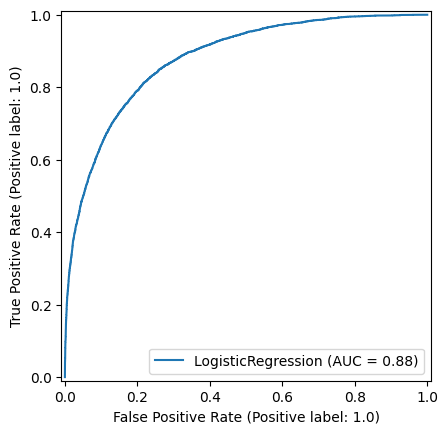

In [ ]:
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
lr_over = load(os.path.join(cwd, 'lr_over.joblib'))


# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(lr_over,X_train_over, X_test, y_train_over, y_test)




## 4_Optim_GridSearch

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# On fait le GridSearch sur un set d'entraînement sous-échantillonné
# Undersampling
#
# X_train_under, y_train_under = undersample(X_train, y_train)

#
# Optimisation du modèle
#
print("Optimize hyperparameters ...")

# Ajustement des Hyper-parametres
#
logreg_params = {
    'C': [1, 1e8, 1e16],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]
}

lr_gs = LogisticRegression(random_state=42)
lr_gs = GridSearchCV(lr_gs, logreg_params, scoring='accuracy', cv=3)
#lr_gs.fit(X_train_under, y_train_under)
lr_gs.fit(X_train, y_train)

#
# Affichage des meilleurs paramètres
#
print("Best hyperparameters ...")
print(lr_gs.best_params_)
print(lr_gs.best_score_)

# Sauvegarde du modèle
#
dump(lr_gs, os.path.join(cwd, 'lr_gs.joblib'))

# Entraînement du modèle
lr_best = LogisticRegression(random_state=42,
                               C=100000000.0,
                               fit_intercept= True,
                               max_iter=50
                               )
lr_best.fit(X_train, y_train)

# Sauvegarde du best
#
dump(lr_best, os.path.join(cwd, 'lr_best.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Optimize hyperparameters ...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters ...
{'C': 100000000.0, 'fit_intercept': True, 'max_iter': 50, 'random_state': 42}
0.8495947164401693


['/content/lr_best.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     17131
         1.0       0.73      0.52      0.61      4952

    accuracy                           0.85     22083
   macro avg       0.80      0.73      0.76     22083
weighted avg       0.84      0.85      0.84     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8497
Test score:  0.8488




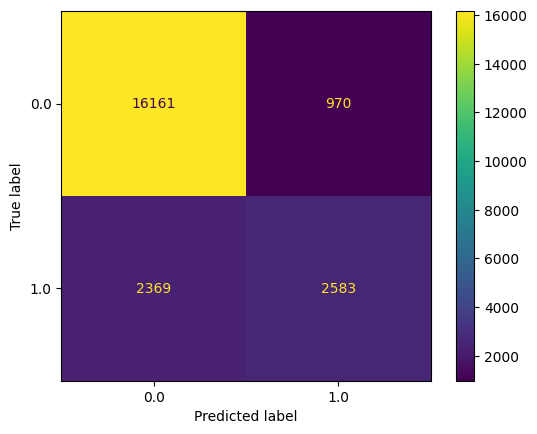

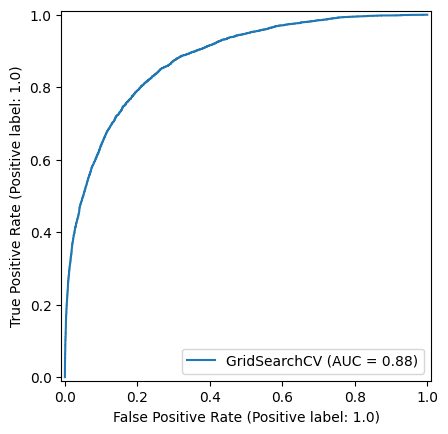

In [ ]:
# import resultat
# import build_sets as bs
#
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
lr_gs = load(os.path.join(cwd, 'lr_gs.joblib'))


# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(lr_gs,X_train, X_test, y_train, y_test)



## 5_Interpret



---



#**MLPClassifier**

## 1_Normal

### Train Model

In [ ]:
from sklearn import neural_network

#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Entraînement du modèle
#
print('Training MLP Classifier ...')
mlpc = neural_network.MLPClassifier(max_iter=500, early_stopping=True, random_state=678)
mlpc.fit(X_train, y_train)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(mlpc, os.path.join(cwd, 'mlpc.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Training MLP Classifier ...
Save model ...


['/content/mlpc.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     17131
         1.0       0.73      0.59      0.65      4952

    accuracy                           0.86     22083
   macro avg       0.81      0.76      0.78     22083
weighted avg       0.85      0.86      0.85     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8597
Test score:  0.8593




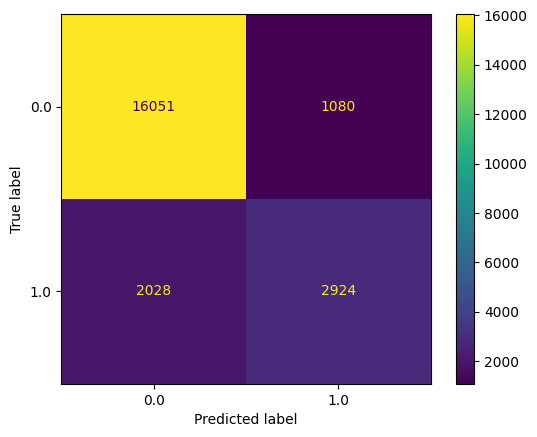

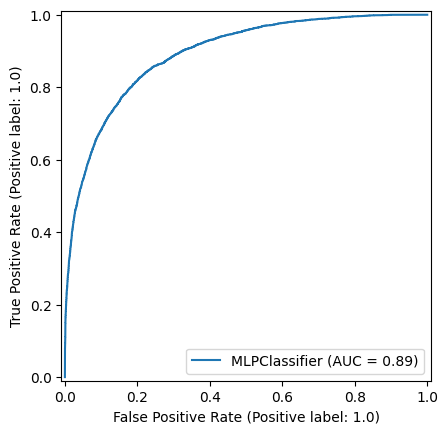

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
mlpc = load(os.path.join(cwd, 'mlpc.joblib'))


#
# Résultats (matrice de confusion, précision/recall)
#
resultat(mlpc, X_train, X_test, y_train, y_test)



## 2_UnderSampling

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Undersampling
#
X_train_under, y_train_under = undersample(X_train, y_train)

#
# Entraînement du modèle
#
print('Training MLP Classifier ...')
mlpc_under = neural_network.MLPClassifier(max_iter=500, early_stopping=True, random_state=678)
mlpc_under.fit(X_train_under, y_train_under)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(mlpc_under, os.path.join(cwd, 'mlpc_under.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
UnderSampling : Random ...
Training MLP Classifier ...
Save model ...


['/content/mlpc_under.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     17131
         1.0       0.54      0.80      0.65      4952

    accuracy                           0.81     22083
   macro avg       0.74      0.80      0.76     22083
weighted avg       0.85      0.81      0.82     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8049
Test score:  0.8051




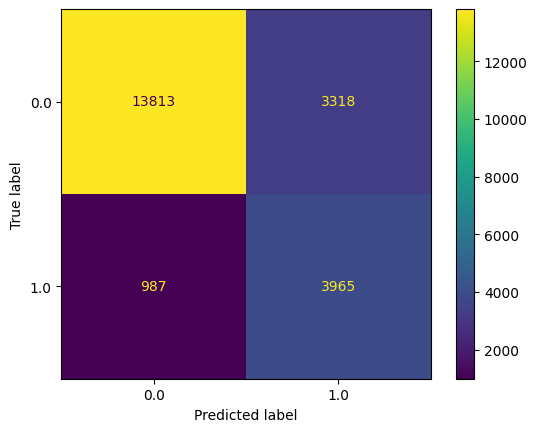

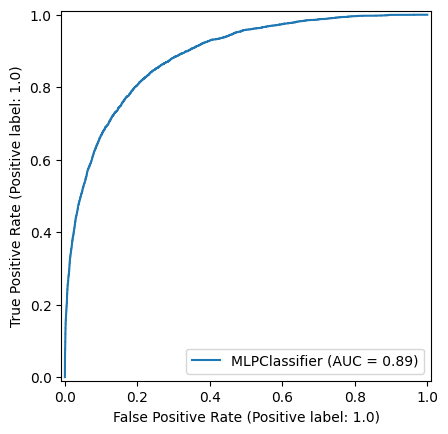

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
mlpc_under = load(os.path.join(cwd, 'mlpc_under.joblib'))


#
# Résultats (matrice de confusion, précision/recall)
#
resultat(mlpc_under, X_train_under, X_test, y_train_under, y_test)


## 3_Oversampling

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Undersampling
#
X_train_over, y_train_over = oversample(X_train, y_train)

#
# Entraînement du modèle
#
print('Training MLP Classifier ...')
mlpc_over = neural_network.MLPClassifier(max_iter=500, early_stopping=True, random_state=678)
mlpc_over.fit(X_train_over, y_train_over)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(mlpc_over, os.path.join(cwd, 'mlpc_over.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
OverSampling : Random ...
Training MLP Classifier ...
Save model ...


['/content/mlpc_over.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     17131
         1.0       0.55      0.81      0.66      4952

    accuracy                           0.81     22083
   macro avg       0.74      0.81      0.76     22083
weighted avg       0.85      0.81      0.82     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8194
Test score:  0.8099




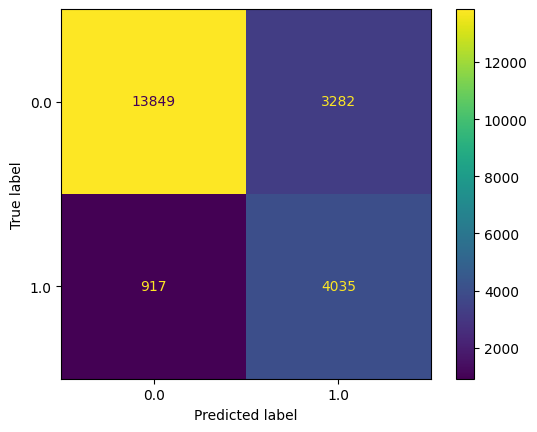

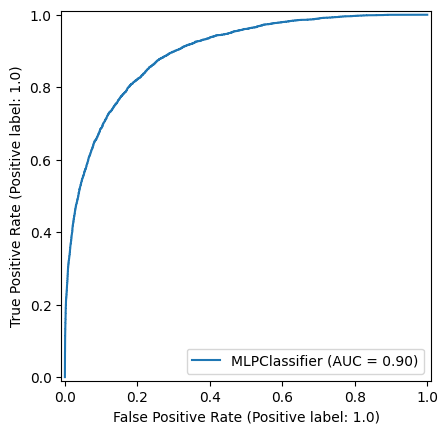

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
mlpc_over = load(os.path.join(cwd, 'mlpc_over.joblib'))



#
# Résultats (matrice de confusion, précision/recall)
#
resultat(mlpc_over, X_train_over, X_test, y_train_over, y_test)



## 4_Optim_GridSearch

### Train Model

### Predict Model

## 5_Interpret



---



# **RandomForest**

## 1_Normal

### Train Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

# #
# # Entraînement du modèle
# #
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)


#
# Sauvegarde du modèle
#
print('Save model ...')
dump(rfc, os.path.join(cwd, 'rfc.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Save model ...


['/content/rfc.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     17131
         1.0       0.76      0.50      0.60      4952

    accuracy                           0.85     22083
   macro avg       0.81      0.73      0.76     22083
weighted avg       0.84      0.85      0.84     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.9888
Test score:  0.8521




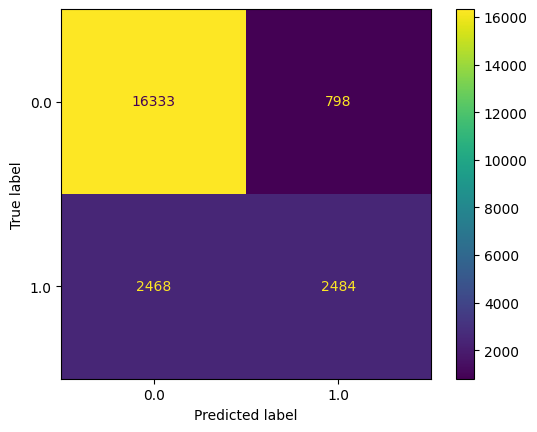

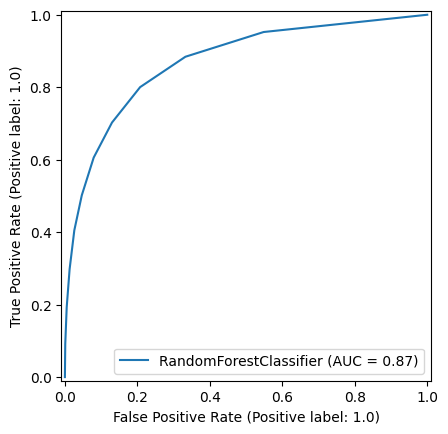

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
rfc = load(os.path.join(cwd, 'rfc.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#

resultat(rfc,X_train, X_test, y_train, y_test)


## 2_UnderSampling

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Undersampling
#
X_train_under, y_train_under = undersample(X_train, y_train)

rfc_under = RandomForestClassifier(n_estimators=10, random_state=42)
rfc_under.fit(X_train_under, y_train_under)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(rfc_under, os.path.join(cwd, 'rfc_under.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
UnderSampling : Random ...
Save model ...


['/content/rfc_under.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87     17131
         1.0       0.56      0.75      0.64      4952

    accuracy                           0.81     22083
   macro avg       0.74      0.79      0.76     22083
weighted avg       0.84      0.81      0.82     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.9899
Test score:  0.8115




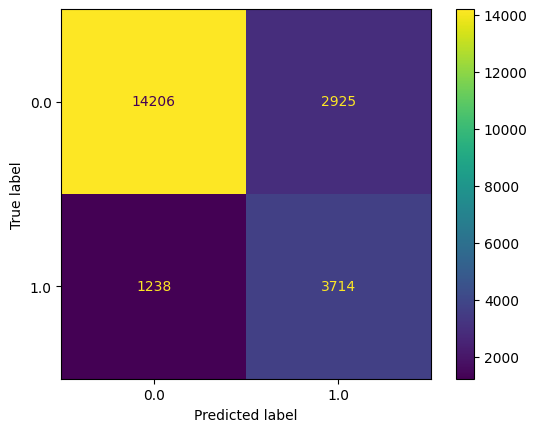

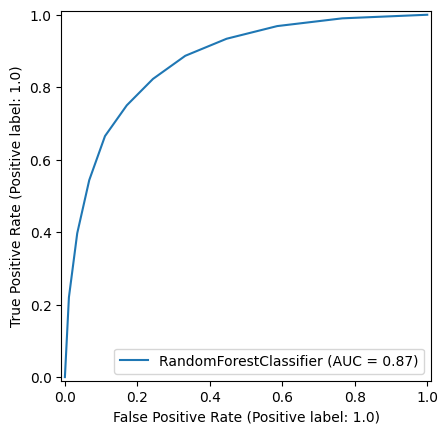

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
rfc_under = load(os.path.join(cwd, 'rfc_under.joblib'))


#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#

resultat(rfc_under,X_train_under, X_test, y_train_under, y_test)


## 3_Oversampling

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# oversampling
#
X_train_over, y_train_over = oversample(X_train, y_train)

rfc_over = RandomForestClassifier(n_estimators=10, random_state=42)
rfc_over.fit(X_train_over, y_train_over)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(rfc_over, os.path.join(cwd, 'rfc_over.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
OverSampling : Random ...
Save model ...


['/content/rfc_over.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     17131
         1.0       0.72      0.57      0.64      4952

    accuracy                           0.85     22083
   macro avg       0.80      0.75      0.77     22083
weighted avg       0.85      0.85      0.85     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.9988
Test score:  0.8541




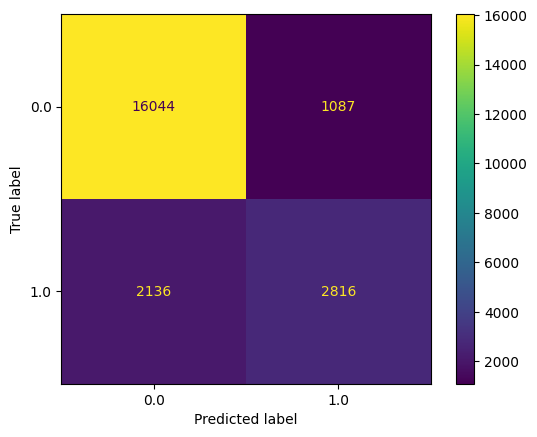

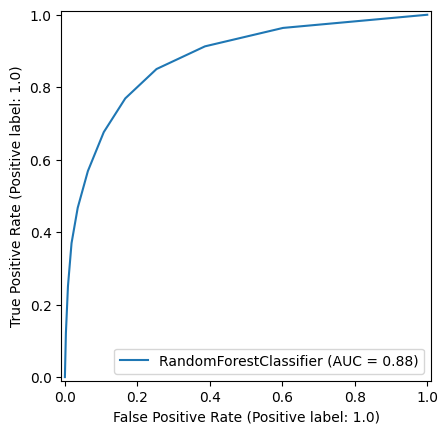

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
rfc_over = load(os.path.join(cwd, 'rfc_over.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#

resultat(rfc_over,X_train_over, X_test, y_train_over, y_test)



## 4_Optim_GridSearch

### Train Model

In [ ]:
rfc_params = {
    'n_estimators': [10, 50],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10]
}

rfc_gs = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), rfc_params, scoring='accuracy', cv=3)
rfc_gs.fit(X_train, y_train)

print(rfc_gs.best_params_)

# # Sauvegarde du modèle
dump(rfc_gs, os.path.join(cwd, 'rfc_gs.joblib'))

# %%
# Entraînement du modèle
rfc_best = RandomForestClassifier(random_state=42,
                               n_estimators=100,
                               min_samples_split= 5,
                               criterion='entropy',
                               n_jobs=-1
                               )
rfc_best.fit(X_train, y_train)


# # Sauvegarde du modèle
dump(rfc_best, os.path.join(cwd, 'rfc_best.joblib'))

{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 50}


['/content/rfc_best.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     17131
         1.0       0.78      0.54      0.64      4952

    accuracy                           0.86     22083
   macro avg       0.83      0.75      0.78     22083
weighted avg       0.86      0.86      0.85     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.9966
Test score:  0.8634




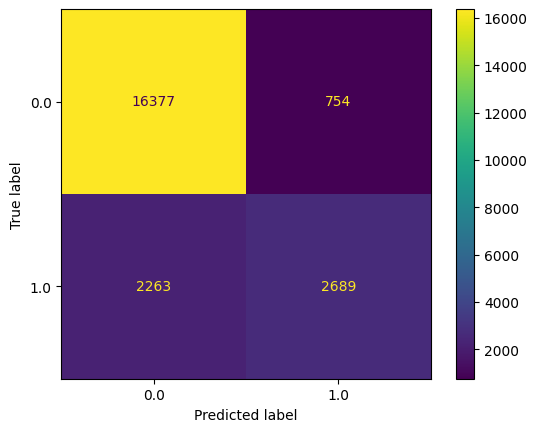

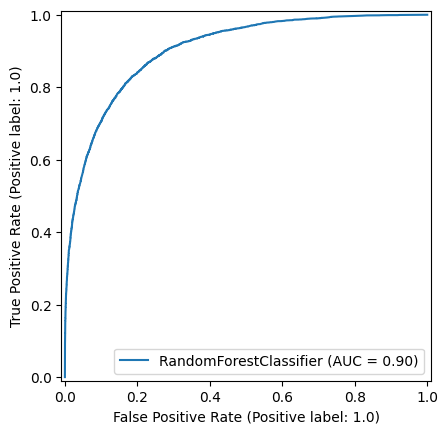

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
rfc_best = load(os.path.join(cwd, 'rfc_best.joblib'))


#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(rfc_best,X_train, X_test, y_train, y_test)


## 5_Interpret



---



# **SVM**

## 1_Normal

### train model

In [ ]:
from sklearn import svm

#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Entraînement du modèle
#
print('Training SVM Classifier ...')
clf = svm.SVC()
clf.fit(X_train, y_train)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(clf, os.path.join(cwd, 'svm.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Training SVM Classifier ...
Save model ...


['/content/svm.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     17131
         1.0       0.78      0.54      0.64      4952

    accuracy                           0.86     22083
   macro avg       0.83      0.75      0.78     22083
weighted avg       0.86      0.86      0.85     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.9966
Test score:  0.8634




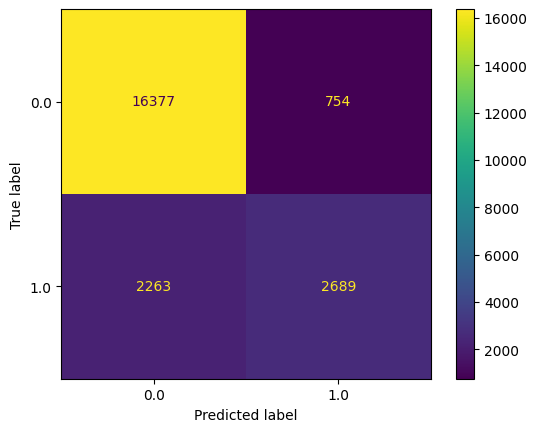

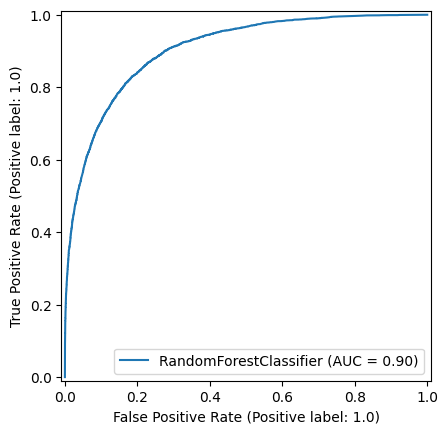

In [ ]:
#
# Set de validation et set de test normalisés
#
Xtrain, Xtest, ytrain, ytest = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
svm = load(os.path.join(cwd, 'svm.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(rfc_best,X_train, X_test, y_train, y_test)


## 2_UnderSampling

### train model

In [88]:
from sklearn import svm
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Undersampling
#
X_train_under, y_train_under = undersample(X_train, y_train)

#
# Entraînement du modèle
#
print('Training SVM Classifier ...')
svm_under = svm.SVC()
svm_under.fit(X_train_under, y_train_under)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(svm_under, os.path.join(cwd, 'svm_under.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
UnderSampling : Random ...
Training SVM Classifier ...
Save model ...


['/content/svm_under.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     17131
         1.0       0.56      0.80      0.66      4952

    accuracy                           0.81     22083
   macro avg       0.74      0.81      0.76     22083
weighted avg       0.85      0.81      0.82     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8174
Test score:  0.8117




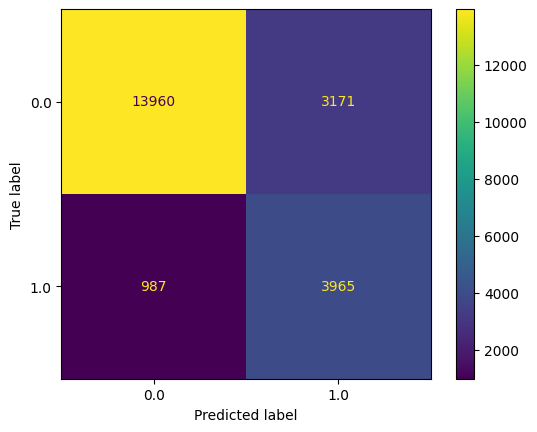

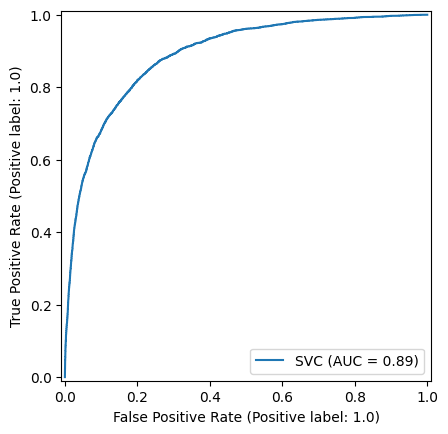

In [ ]:
Xtrain, Xtest, ytrain, ytest = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
svm_under = load(os.path.join(cwd, 'svm_under.joblib'))

#
# Résultats (matrice de confusion, précision/recall)
#
resultat(svm_under,X_train_under, X_test, y_train_under, y_test)

## 3_Oversampling

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Oversampling
#
X_train_over, y_train_over = oversample(X_train, y_train, strategy=2)

#
# Entraînement du modèle
#
print('Training SVM Classifier ...')
svm_over = svm.SVC()
svm_over.fit(X_train_over, y_train_over)

#
# Sauvegarde du modèle
#
print('Save model ...')
dump(svm_over, os.path.join(cwd, 'svm_over.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
OverSampling : SMOTE ...
Training SVM Classifier ...
Save model ...


['/content/svm_over.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88     17131
         1.0       0.57      0.79      0.66      4952

    accuracy                           0.82     22083
   macro avg       0.75      0.81      0.77     22083
weighted avg       0.85      0.82      0.83     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8352
Test score:  0.8202




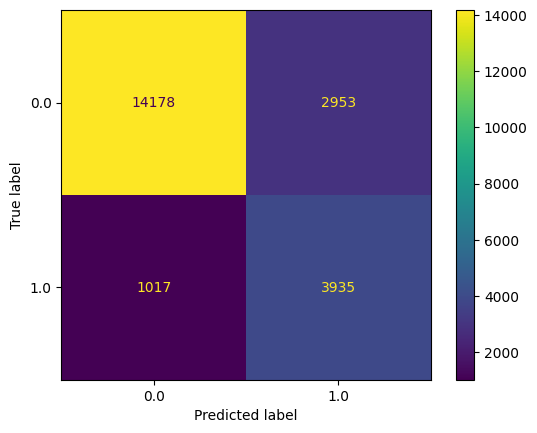

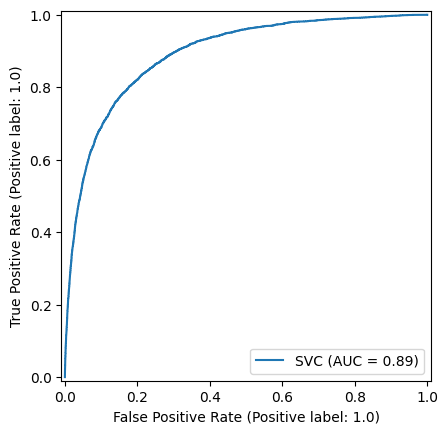

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
svm_over = load(os.path.join(cwd, 'svm_over.joblib'))

#
# Résultats (matrice de confusion, précision/recall)
#

resultat(svm_over,X_train_over, X_test, y_train_over, y_test)

## 4_Optim_GridSearch

### Train Model

In [ ]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# On fait le GridSearch sur un set d'entraînement sous-échantillonné
# Undersampling
#
# X_train_under, y_train_under = undersample(X_train, y_train)

#
# Optimisation du modèle
#
print("Optimize hyperparameters ...")
#param_grid = {'C':[0.1,1,10], 'kernel':['linear','rbf']} # => C=10, kernel=rbf
param_grid = {'C':[5,10,20,50], 'kernel':['rbf']} # => C=10, kernel=rbf

svm_gs = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1)
#grid.fit(Xtrain_under, ytrain_under)
svm_gs.fit(X_train, y_train)
#
# Affichage des meilleurs paramètres
#
print("Best hyperparameters ...")
print(svm_gs.best_params_)

#
# Sauvegarde du meilleur modèle
#
print("Save model ...")
dump(svm_gs, os.path.join(cwd, 'svm_gs.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Optimize hyperparameters ...


### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     17131
         1.0       0.78      0.54      0.64      4952

    accuracy                           0.86     22083
   macro avg       0.83      0.75      0.78     22083
weighted avg       0.86      0.86      0.85     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8811
Test score:  0.8629




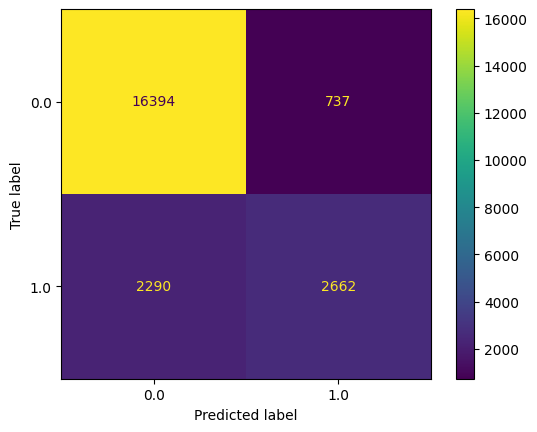

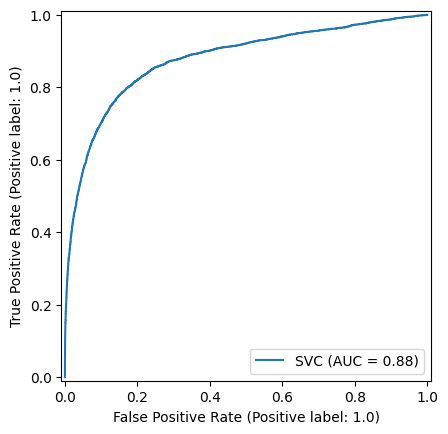

In [90]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
svm_gs = load(os.path.join(cwd, 'svm_gs.joblib'))

#
# Résultats (matrice de confusion, précision/recall)
#
resultat(svm_gs,X_train, X_test, y_train, y_test)



## 5_Interpret



---



# **Xgboost**

## 1_Normal

### Train Model

In [44]:
from xgboost import XGBClassifier
# import resultat
# import build_sets as bs

#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Entraînement du modèle
#
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)


# Sauvegarde du modèle
#
dump(xgb, os.path.join(cwd, 'xgb.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...


['/content/xgb.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     17131
         1.0       0.76      0.59      0.66      4952

    accuracy                           0.87     22083
   macro avg       0.82      0.77      0.79     22083
weighted avg       0.86      0.87      0.86     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.9034
Test score:  0.8658




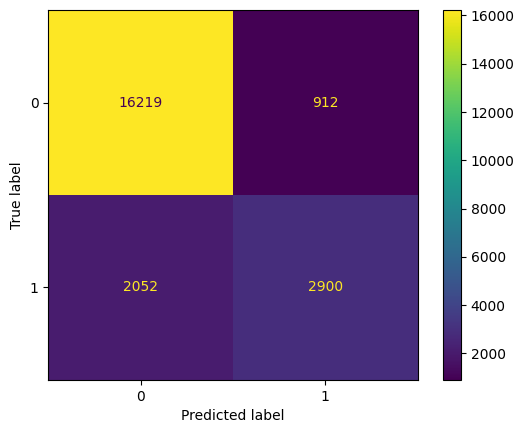

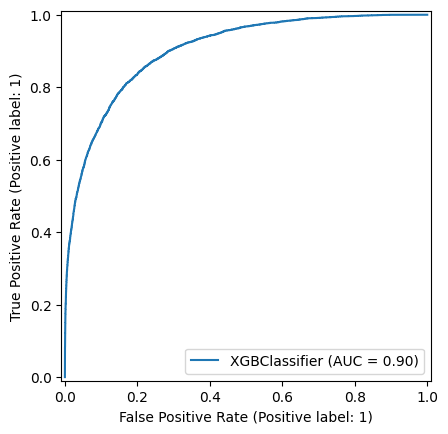

In [45]:
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
xgb = load(os.path.join(cwd, 'xgb.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(xgb,X_train, X_test, y_train, y_test)


## 2_UnderSampling

### train model

In [46]:
from xgboost import XGBClassifier
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Undersampling
#
X_train_under, y_train_under = undersample(X_train, y_train)

#
# Entraînement du modèle
#
xgb_under = XGBClassifier(random_state=42)
xgb_under.fit(X_train_under, y_train_under)


# Sauvegarde du modèle
#
dump(xgb_under, os.path.join(cwd, 'xgb_under.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
UnderSampling : Random ...


['/content/xgb_under.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.87     17131
         1.0       0.56      0.81      0.67      4952

    accuracy                           0.82     22083
   macro avg       0.75      0.82      0.77     22083
weighted avg       0.85      0.82      0.83     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8972
Test score:  0.8171




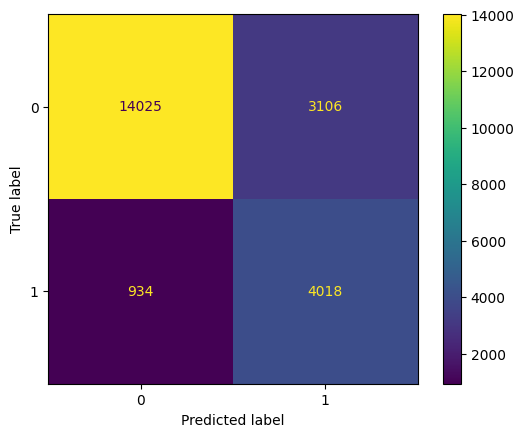

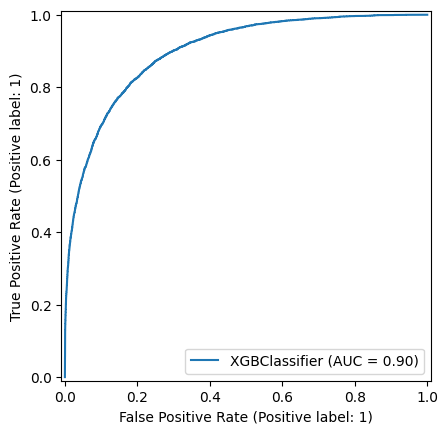

In [47]:
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
xgb_under = load(os.path.join(cwd, 'xgb_under.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(xgb_under,X_train_under, X_test, y_train_under, y_test)

## 3_Oversampling

### Train Model

In [48]:
from xgboost import XGBClassifier
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Underover
X_train_over, y_train_overr = oversample(X_train, y_train)

#
# Entraînement du modèle
#
xgb_over = XGBClassifier(random_state=42)
xgb_over.fit(X_train_over, y_train_over)

# Sauvegarde du modèle
#
dump(xgb_over, os.path.join(cwd, 'xgb_over.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
OverSampling : Random ...


['/content/xgb_over.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     17131
         1.0       0.60      0.77      0.68      4952

    accuracy                           0.83     22083
   macro avg       0.77      0.81      0.78     22083
weighted avg       0.86      0.83      0.84     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.8852
Test score:  0.8348




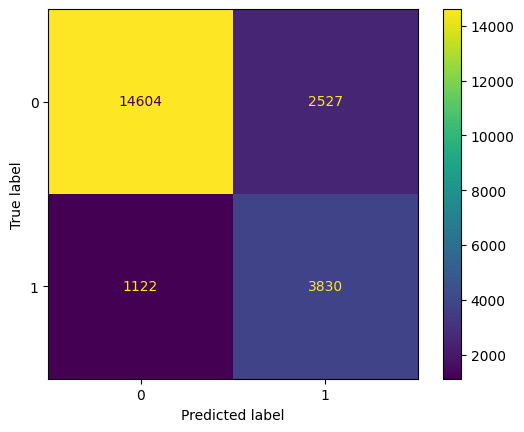

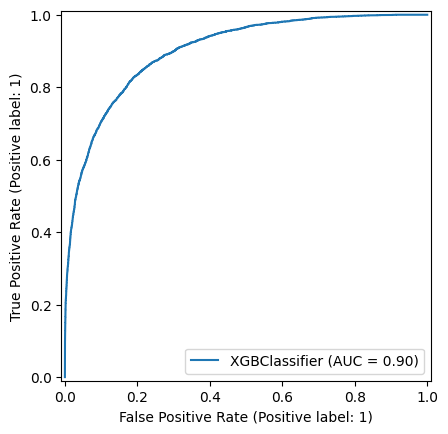

In [49]:
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
xgb_over = load(os.path.join(cwd, 'xgb_over.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(xgb_over,X_train_over, X_test, y_train_over, y_test)

## 4_Optim_GridSearch

### Train Model

In [62]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
# import resultat
# import build_sets as bs
# Ajustement des Hyper-parametres
#

# Controle a effectuer car visiblement données disproportionnée ...

# Lu dans le guide : "For common cases such as ads clickthrough log, the dataset is extremely imbalanced. This can affect the training of XGBoost model, and there are two ways to improve it.
#
#     - If you care only about the overall performance metric (AUC) of your prediction
#         Balance the positive and negative weights via scale_pos_weight
#         Use AUC for evaluation
#
#     - If you care about predicting the right probability
#         In such a case, you cannot re-balance the dataset
#         Set parameter max_delta_step to a finite number (say 1) to help convergence

y_train.value_counts()
# ~77.5% des données de notre training set sont dans la classe 0 , donc nous devons gerer cela
# Cas 1

xgb_params  = {
    'max_depth': stats.randint(3, 5),
    'learning_rate': stats.uniform(0.01, 0.15),
    'gamma': stats.uniform(0.00, 1.0),
    'reg_lambda': stats.randint(1, 20),
    'scale_pos_weight':stats.randint(1, 5),
    'subsample':stats.uniform(0.6, 1.0),
    'colsample_bytree': stats.uniform(0.1, 0.9)


}

# Create the XGBoost model object
xgb_gs  = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
xgb_gs = RandomizedSearchCV(xgb_gs, param_distributions=xgb_params, n_iter=10, cv=3, scoring='roc_auc')
#print(xgb_gs.best_params_)

# Fit the RandomizedSearchCV object to the training data
xgb_gs.fit(X_train, y_train)

# Sauvegarde du modèle
#
dump(xgb_gs, os.path.join(cwd, 'xgb_gs.joblib'))

# Print the best set of hyperparameters and the corresponding score
# print("Best set of hyperparameters: ", xgb_gs.best_params_)
# print("Best score: ", xgb_gs.best_score_)

# Entraînement du modèle
xgb_best=XGBClassifier(
                    seed=42,
                    max_depth = 4,
                    learning_rate = 0.15,
                    gamma=0.15,
                    reg_lambda = 11,
                    scale_pos_weight = 1,
                    subsample = 0.65,
                    colsample_bytree =1)
xgb_best.fit(X_train,y_train)


# Sauvegarde du modèle
#
dump(xgb_best, os.path.join(cwd, 'xgb_best.joblib'))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
   

['/content/xgb_best.joblib']

### Predict

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     17131
         1.0       0.77      0.55      0.64      4952

    accuracy                           0.86     22083
   macro avg       0.82      0.75      0.78     22083
weighted avg       0.86      0.86      0.85     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 0.868
Test score:  0.8622




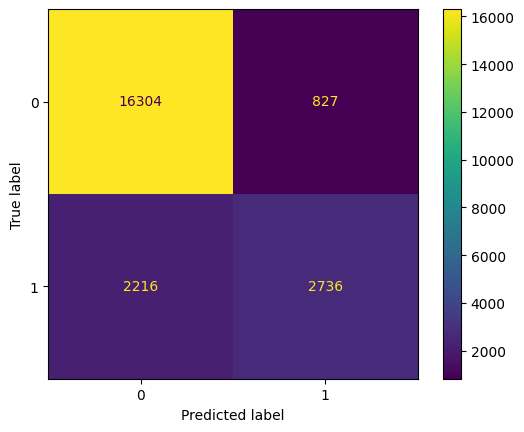

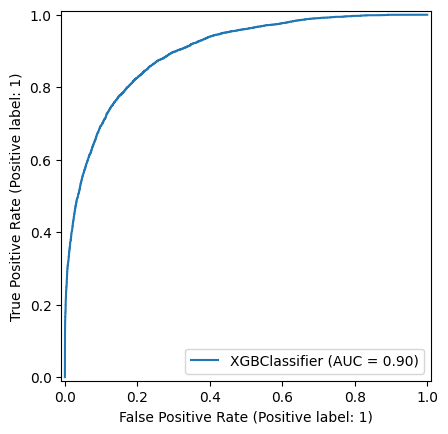

In [63]:
# import resultat
# import build_sets as bs
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
xgb_best = load(os.path.join(cwd, 'xgb_best.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(xgb_best,X_train, X_test, y_train, y_test)

## 5_Interpret

In [85]:
best=xgb_best.get_booster()

for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: ' %importance_type, best.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': 'red'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': 'green'}

xgb_best.to_graphviz(xgb_best,num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

weight:  {'f0': 45.0, 'f1': 58.0, 'f2': 53.0, 'f3': 34.0, 'f4': 92.0, 'f5': 57.0, 'f6': 123.0, 'f7': 42.0, 'f8': 73.0, 'f9': 40.0, 'f10': 44.0, 'f11': 47.0, 'f12': 151.0, 'f13': 171.0, 'f14': 14.0, 'f15': 51.0, 'f16': 43.0, 'f17': 1.0, 'f18': 87.0, 'f19': 131.0, 'f20': 35.0, 'f21': 47.0, 'f22': 25.0}
gain:  {'f0': 11.11994743347168, 'f1': 15.408587455749512, 'f2': 66.16752624511719, 'f3': 8.000235557556152, 'f4': 165.25392150878906, 'f5': 11.806745529174805, 'f6': 58.910030364990234, 'f7': 26.365671157836914, 'f8': 24.19194793701172, 'f9': 10.998176574707031, 'f10': 15.001175880432129, 'f11': 15.426559448242188, 'f12': 290.1592102050781, 'f13': 55.765289306640625, 'f14': 12.093978881835938, 'f15': 49.9270133972168, 'f16': 11.817123413085938, 'f17': 8.321455001831055, 'f18': 25.235280990600586, 'f19': 27.281015396118164, 'f20': 19.987546920776367, 'f21': 13.416461944580078, 'f22': 6.705410957336426}
cover:  {'f0': 1313.85595703125, 'f1': 1206.228759765625, 'f2': 1438.4803466796875, 'f3'

NameError: name 'to_graphviz' is not defined



---



# **ExtraTreesClassifier**

## 1_Normal

### Train Model

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
# import build_sets as bs

X_train, X_test, y_train, y_test = build (size_of_test=0.2)

# #
# # Entraînement du modèle
# #
etc = ExtraTreesClassifier(n_estimators=10, random_state=42)
etc.fit(X_train, y_train)


# # Sauvegarde du modèle
dump(etc, os.path.join(cwd,'etc.joblib'))

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...


['/content/etc.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     17131
         1.0       0.77      0.48      0.59      4952

    accuracy                           0.85     22083
   macro avg       0.82      0.72      0.75     22083
weighted avg       0.84      0.85      0.84     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 1.0
Test score:  0.851




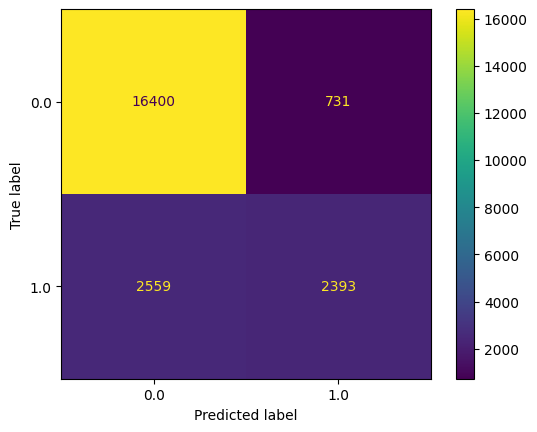

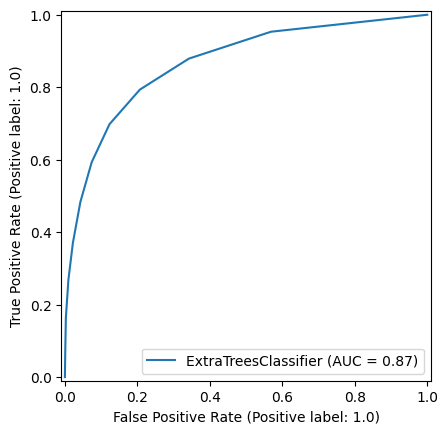

In [67]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
etc = load(os.path.join(cwd, 'etc.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(etc,X_train, X_test, y_train, y_test)

## 2_UnderSampling

### train model

### Predict Model

## 3_Oversampling

### Train Model

### Predict Model

## 4_Optim_GridSearch

### Train Model

In [68]:
# # Ajustement des Hyper-parametres

rfc_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10]
}

rfc_gs = GridSearchCV(ExtraTreesClassifier(random_state=42, n_jobs=-1), rfc_params, scoring='accuracy', cv=3)
rfc_gs.fit(X_train, y_train)

print(rfc_gs.best_params_)

# %%
# Entraînement du modèle
etc_best = ExtraTreesClassifier(random_state=42,
                               n_estimators=100,
                               min_samples_split= 2,
                               criterion='entropy',
                               n_jobs=-1
                               )
etc_best.fit(X_train, y_train)

# Sauvegarde du modèle
dump(etc_best, os.path.join(cwd, 'etc_best.joblib'))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 100}


['/content/etc_best.joblib']

### Predict Model

Reading database ...
Cleaning useless variables ...
Building train/test sets ...
Scaling ...
Load model ...
Confusion Matrix
-----------------------------------------------------


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     17131
         1.0       0.80      0.53      0.64      4952

    accuracy                           0.86     22083
   macro avg       0.84      0.75      0.78     22083
weighted avg       0.86      0.86      0.85     22083



ROC Curve
-----------------------------------------------------


Checking model score
-----------------------------------------------------
Train score: 1.0
Test score:  0.865




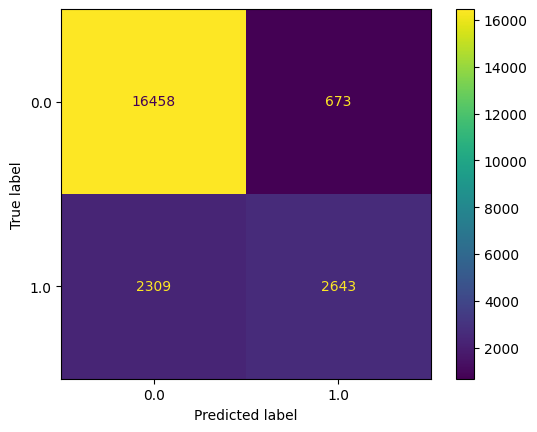

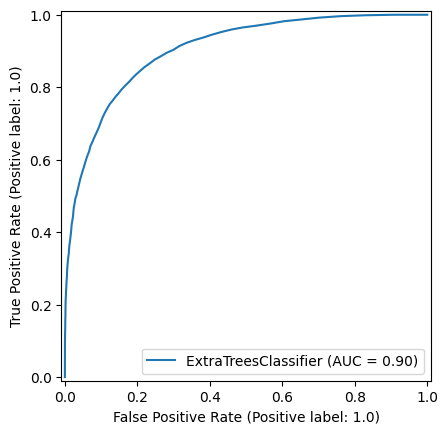

In [69]:
#
# Set de validation et set de test normalisés
#
X_train, X_test, y_train, y_test = build(size_of_test=0.2)

#
# Chargement du modèle fitté
#
print("Load model ...")
etc_best = load(os.path.join(cwd, 'etc_best.joblib'))

#
# Résultats ( Confusion Matrix, Accuracy , Precision , F1)
#
resultat(etc_best,X_train, X_test, y_train, y_test)

## 5_Interpret



---



# **KNN**

## 1_Normal

### Train Model

### Predict Model

## 2_UnderSampling

### train model

### Predict Model

## 3_Oversampling

### Train Model

### Predict Model

## 4_Optim_GridSearch

### Train Model

### Predict Model

## 5_Interpret

# **Model Comparisons**

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

models = [lr_gs, dtc_gs, rfc_gs, svm_gs, xgb_gs]

sns.barplot(x=['Logistic\nRegression', 'Decision\nTree', 'random\nForest','SVM','XGBoost'],
            y=[model.best_score_ for model in models]
           )

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.tight_layout()
plt.savefig('model_accuracies.png', facecolor='white', dpi=100);

AttributeError: 'SVC' object has no attribute 'best_score_'